In [5]:
import xarray as xr
import intake
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [1]:
path_precip = "lehre/msc-intro-computational-meteorology-exercises-w2025/ERA5/ERA5_monthly.1940-2025.precip_radflx.nc"
path_wind = "lehre/msc-intro-computational-meteorology-exercises-w2025/ERA5/ERA5_monthly.1940-2025.t2m_wind10.nc"

In [6]:
data_precip = xr.open_dataset(path_precip)
data_wind = xr.open_dataset(path_wind)

In [7]:
data_wind

<xarray.Dataset> Size: 13GB
Dimensions:     (valid_time: 1029, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01 ... 2025-09-01
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 16kB ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 4GB ...
    v10         (valid_time, latitude, longitude) float32 4GB ...
    t2m         (valid_time, latitude, longitude) float32 4GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-27T21:14 GRIB to CDM+CF via cfgrib-0.9.1...

In [53]:
long_vals

array([282.25, 282.5 , 282.75, 283.  , 283.25, 283.5 , 283.75, 284.  ,
       284.25, 284.5 , 284.75, 285.  , 285.25, 285.5 , 285.75, 286.  ,
       286.25, 286.5 , 286.75, 287.  , 287.25, 287.5 , 287.75, 288.  ,
       288.25, 288.5 , 288.75, 289.  , 289.25, 289.5 , 289.75, 290.  ,
       290.25, 290.5 , 290.75, 291.  , 291.25, 291.5 , 291.75, 292.  ,
       292.25, 292.5 , 292.75, 293.  , 293.25, 293.5 , 293.75, 294.  ,
       294.25, 294.5 , 294.75, 295.  , 295.25, 295.5 , 295.75, 296.  ,
       296.25, 296.5 , 296.75, 297.  , 297.25, 297.5 , 297.75])

In [37]:
lat_boundary = [-32,-14]
long_boundary = [360-78,360-62]

#selecting the lat and long values in our dataset which we can then use to select data
lat_vals = data_wind["t2m"]["latitude"].values
long_vals = data_wind["t2m"]["longitude"].values
lat_vals = lat_vals[lat_vals>lat_boundary[0]]
lat_vals = lat_vals[lat_vals<lat_boundary[1]]

long_vals = long_vals[long_vals>long_boundary[0]]
long_vals = long_vals[long_vals<long_boundary[1]]
#long_vals

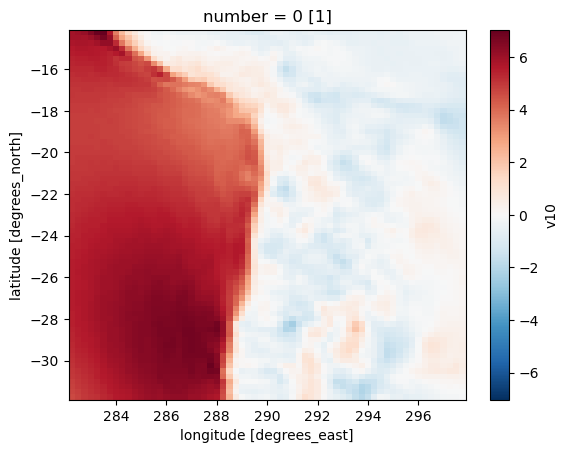

In [43]:
data_wind.sel({"latitude":lat_vals,"longitude":long_vals}).mean("valid_time")["v10"].plot()

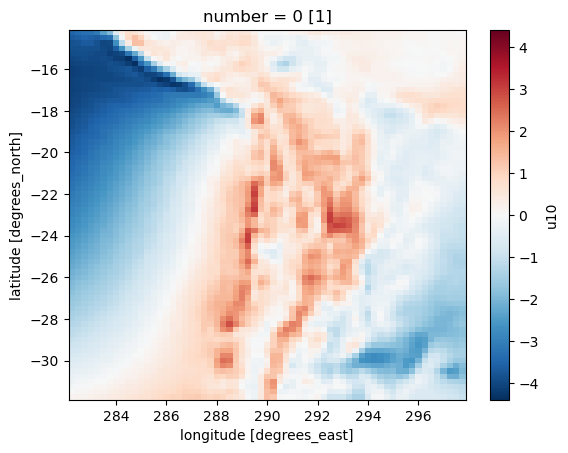

In [40]:
data_wind.sel({"latitude":lat_vals,"longitude":long_vals}).mean("valid_time")["u10"].plot()

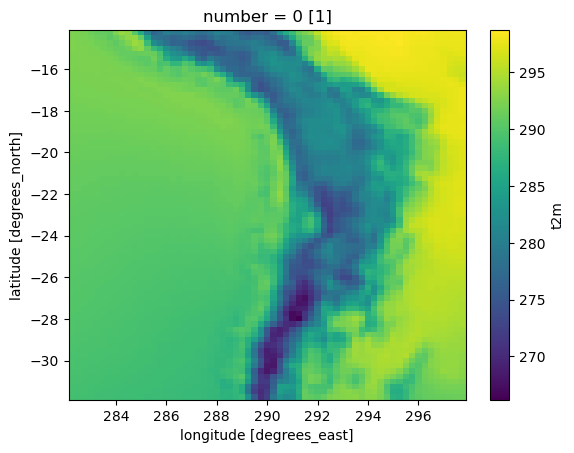

In [34]:
data_wind["t2m"].sel({"latitude":lat_vals,"longitude":long_vals}).mean("valid_time").plot()

In [31]:
data_wind["t2m"].sel({"latitude":lat_vals,"longitude":long_vals})

<xarray.DataArray 't2m' (valid_time: 1029, latitude: 71, longitude: 63)> Size: 18MB
[4602717 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01 ... 2025-09-01
  * latitude    (latitude) float64 568B -14.25 -14.5 -14.75 ... -31.5 -31.75
  * longitude   (longitude) float64 504B 282.2 282.5 282.8 ... 297.2 297.5 297.8
    expver      (valid_time) <U4 16kB ...
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

CIMP6 data

In [56]:
cat = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")
query = dict(
    variable_id=['tas'],
    table_id='Amon',
    experiment_id=['historical'],
    grid_label='gn',
    member_id='r1i1p1f1'
)

cat_subset = cat.search(require_all_on=["source_id"], **query)
dsets = cat_subset.to_dataset_dict(
    zarr_kwargs={'consolidated': True},
    storage_options={'token': 'anon'}
)
list(dsets)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


['CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn',
 'CMIP.CCCma.CanESM5.historical.Amon.gn',
 'CMIP.UA.MCM-UA-1-0.historical.Amon.gn',
 'CMIP.NASA-GISS.GISS-E2-1-H.historical.Amon.gn',
 'CMIP.FIO-QLNM.FIO-ESM-2-0.historical.Amon.gn',
 'CMIP.AWI.AWI-ESM-1-1-LR.historical.Amon.gn',
 'CMIP.NCAR.CESM2.historical.Amon.gn',
 'CMIP.NUIST.NESM3.historical.Amon.gn',
 'CMIP.NASA-GISS.GISS-E2-1-G-CC.historical.Amon.gn',
 'CMIP.NCAR.CESM2-WACCM.historical.Amon.gn',
 'CMIP.MPI-M.MPI-ESM1-2-HR.historical.Amon.gn',
 'CMIP.CAS.FGOALS-g3.historical.Amon.gn',
 'CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.historical.Amon.gn',
 'CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.Amon.gn',
 'CMIP.SNU.SAM0-UNICON.historical.Amon.gn',
 'CMIP.CMCC.CMCC-ESM2.historical.Amon.gn',
 'CMIP.BCC.BCC-ESM1.historical.Amon.gn',
 'CMIP.NCC.NorESM2-MM.historical.Amon.gn',
 'CMIP.NASA-GISS.GISS-E2-1-G.historical.Amon.gn',
 'CMIP.CSIRO.ACCESS-ESM1-5.historical.Amon.gn',
 'CMIP.NCC.NorCPM1.historical.Amon.gn',
 'CMIP.CAS.CAS-ESM2-0.historical.Am

In [61]:
curr_ds

<xarray.Dataset> Size: 406MB
Dimensions:         (lat: 160, bnds: 2, lon: 320, member_id: 1,
                     dcpp_init_year: 1, time: 1980)
Coordinates:
    height          float64 8B ...
  * lat             (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
    lat_bnds        (lat, bnds) float64 3kB dask.array<chunksize=(160, 2), meta=np.ndarray>
  * lon             (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 356.6 357.8 358.9
    lon_bnds        (lon, bnds) float64 5kB dask.array<chunksize=(320, 2), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
    time_bnds       (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds
Data variables:
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 406MB dask.array<chunksize=(1, 1, 600, 160, 320), meta=np.ndarray>
Attributes: (12/65)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    Standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            3025.0
    cmor_version:                     3.4.0
    ...                               ...
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/CAMS/CAMS-CSM1-0/...
    intake_esm_attrs:version:         20190708
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn

In [63]:
curr_ds["tas"]["lat"].values

array([-89.14151943, -88.02942887, -86.91077081, -85.79062888,
       -84.66992408, -83.54894691, -82.42781752, -81.30659452,
       -80.18530987, -79.06398248, -77.94262425, -76.82124303,
       -75.69984422, -74.57843166, -73.45700815, -72.33557575,
       -71.21413608, -70.09269035, -68.97123954, -67.84978441,
       -66.7283256 , -65.60686361, -64.48539887, -63.36393171,
       -62.24246244, -61.1209913 , -59.9995185 , -58.87804422,
       -57.75656862, -56.63509184, -55.51361398, -54.39213516,
       -53.27065546, -52.14917496, -51.02769373, -49.90621184,
       -48.78472933, -47.66324626, -46.54176268, -45.42027863,
       -44.29879413, -43.17730923, -42.05582395, -40.93433832,
       -39.81285237, -38.69136612, -37.56987959, -36.4483928 ,
       -35.32690576, -34.2054185 , -33.08393102, -31.96244335,
       -30.8409555 , -29.71946747, -28.59797927, -27.47649093,
       -26.35500245, -25.23351384, -24.1120251 , -22.99053625,
       -21.86904729, -20.74755823, -19.62606908, -18.50

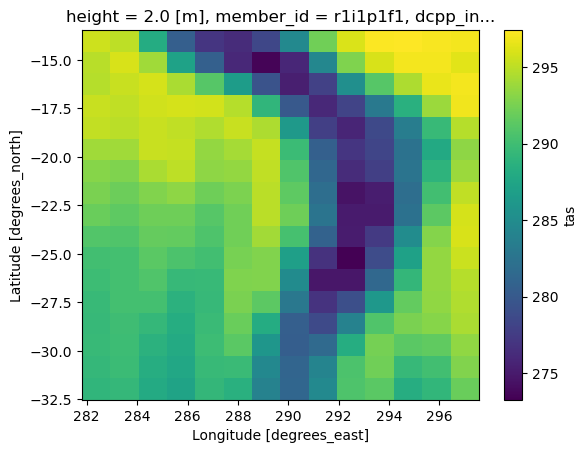

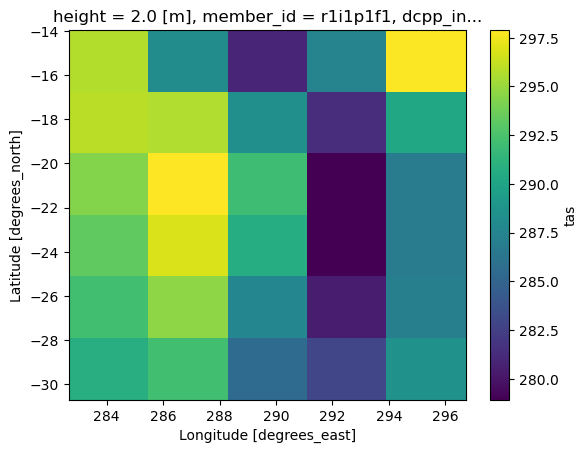

In [67]:
dsiter = iter(dsets)

n = 2
times_mean = np.arange(1850,2024,1)         #timesstamps for model mean
model_mean = np.zeros(times_mean.size)      #variable for the mean of the model
model_mean_diff = np.zeros(times_mean.size) #variable for mean anomaly
meancount = np.zeros(times_mean.size)       #count of how many models contribute to the mean(at borders only like 2 models contribute so we cannot divide by n)
maxsize = 0
model_temps = []
for i in range(n):#36
    current_model = next(dsiter)
    curr_ds = dsets[current_model]
    curr_ds = curr_ds.sortby("time")

    #datasets use different variable names for their spacial data we want to average over
    if "lat" in dsets[current_model].coords:
        #CMIP_mean_temps = curr_ds["tas"].mean(dim=['lat', 'lon']).resample(time="YE").mean().values.ravel()
        
        d_lat_vals = curr_ds["tas"]["lat"].values
        d_long_vals = curr_ds["tas"]["lon"].values
        d_lat_vals = d_lat_vals[d_lat_vals>lat_boundary[0]]
        d_lat_vals = d_lat_vals[d_lat_vals<lat_boundary[1]]

        d_long_vals = d_long_vals[d_long_vals>long_boundary[0]]
        d_long_vals = d_long_vals[d_long_vals<long_boundary[1]]
        plt.figure()
        curr_ds["tas"].sel({"lat":d_lat_vals,"lon":d_long_vals}).mean("time").plot()

    elif "i" in dsets[current_model].coords:
        continue
        #CMIP_mean_temps = curr_ds["tas"].mean("i").resample(time="YE").mean().values.ravel()
    else:
        continue
        #CMIP_mean_temps = curr_ds["tas"].mean(dim=['latitude', 'longitude']).resample(time="YE").mean().values.ravel()
    """
    m1850_1900 = CMIP_mean_temps[:50].mean()

    times = curr_ds.resample(time="YE").mean()["time"].values.astype('datetime64[Y]')
    label = str.join("-",current_model.split(".")[1:3])

    #calculate the effect on mean of models
    if CMIP_mean_temps.size>maxsize:
        maxsize=CMIP_mean_temps.size
        mtimes=times
    meancount[:CMIP_mean_temps.size]+=1
    model_mean[:CMIP_mean_temps.size] +=+CMIP_mean_temps
    model_mean_diff[:CMIP_mean_temps.size] +=+CMIP_mean_temps-m1850_1900

    model_temps.append([times,CMIP_mean_temps,m1850_1900,label])

times_mean = times_mean[:maxsize]
model_mean = model_mean[:maxsize]/meancount[:maxsize]
model_mean_diff = model_mean_diff[:maxsize]/meancount[:maxsize]
mmm1850_1900 = model_mean[:50].mean()
"""